In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib widget

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
#                    

2023-06-07 13:24:00.836017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 13:24:01.496250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-07 13:24:01.496327: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-07 13:24:01.562182: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-07 13:24:04.519018: W tensorflow/stream_executor/pla

In [6]:
import numpy as np
import os, sys
from IPython.display import Image

sys.path.append('../src/')
sys.path.append('../scripts//')
import bbvi, polyakvi, mapp, hmc, modevi
import gaussianq
import diagnostics as dg
import pdbmodels
from sklearn.covariance import EmpiricalCovariance


2023-06-07 13:25:48.362328: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-06-07 13:25:48.362379: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (worker3083): /proc/driver/nvidia/version does not exist
2023-06-07 13:25:48.364519: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


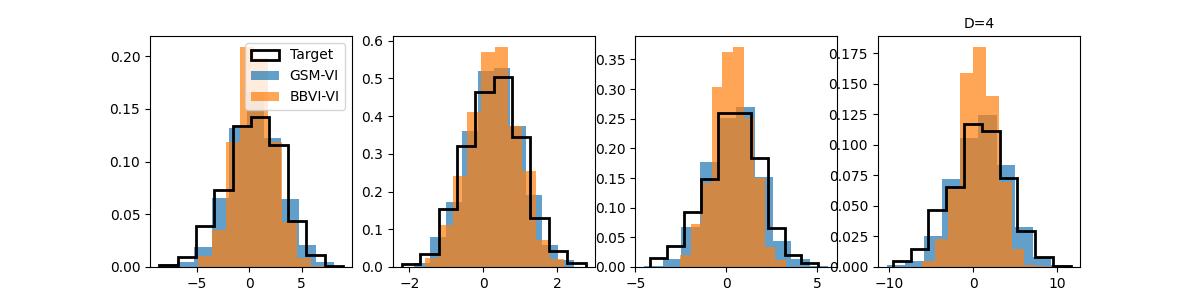

In [12]:
path = './tmp/FRG/d4-c10-n1.00e-02//hist.png'
Image(f"../../gsm-vi/scripts/{path}")

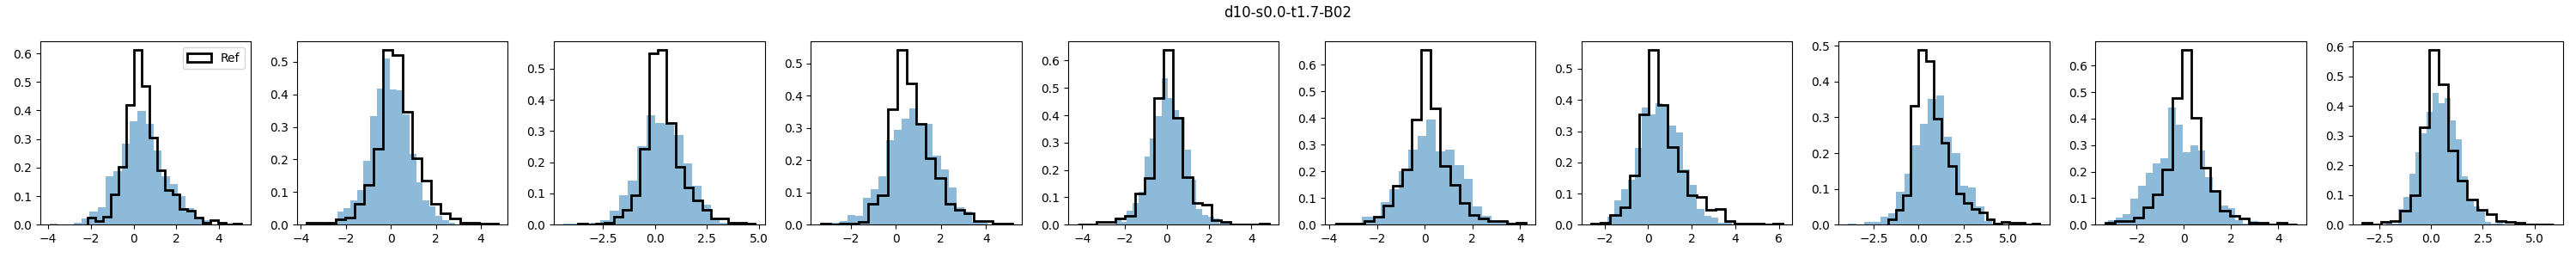

In [11]:
Image('/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/gsm-frg/d10-s0.0-t1.7/B02/hist.png')

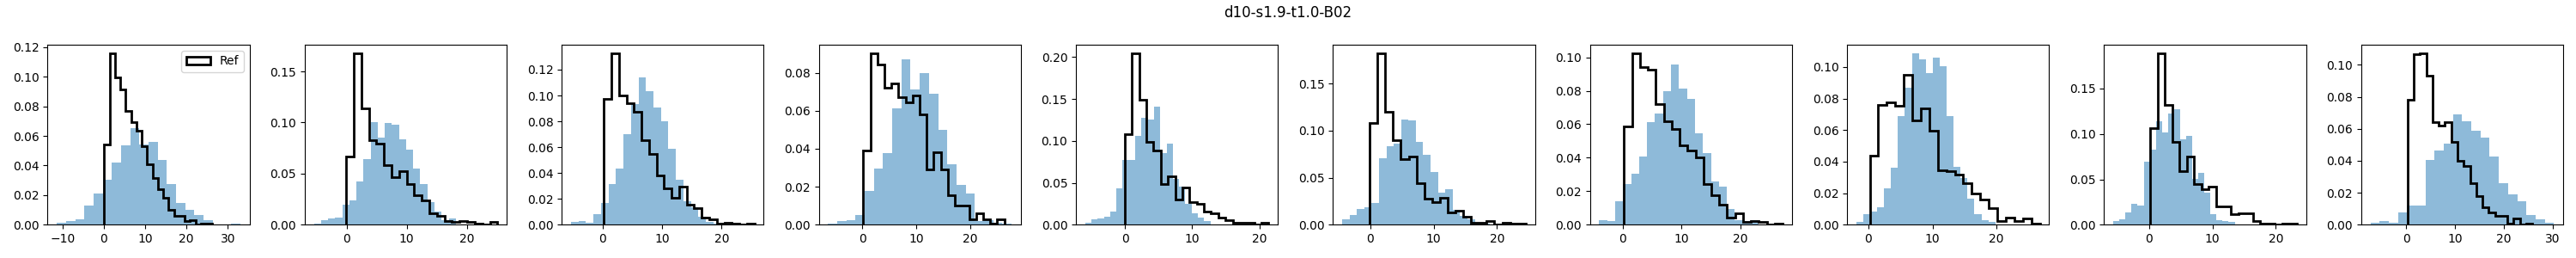

In [16]:
Image('/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/gsm-frg/d10-s1.9-t1.0/B02/hist_0500.png')

# Scaling with dimensions

In [7]:
# Image('/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/d1000-r5-n1.00e-02/B02-truesamples//hist_0100.png')

In [ ]:
mode = 'fdivs'
fsize = 12

lss = ['-', '--', ':', '-.']

scaling = []

for ib, b in enumerate([ 2]):
    ic = 0 
    lbl = None 
    for d in [2**i for i in range(2, 9)]:
        
        if ib == 0 : lbl = f'D={d}'
        try:
            fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/gsm-frg/d{d}-r{d}-n1.00e-02/B{b:02d}/'
            counts = np.load(f'{fpath}/counts.npy')
            
            if mode == 'fdivs':
                divs = np.load(f'{fpath}//fdivs.npy')
                plt.plot(counts, -divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl)
                
            elif mode == 'qdivs':
                divs = np.load(f'{fpath}//qdivs.npy')
                plt.plot(counts, divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl)            
                
        except Exception as e:
            print(e)
        ic+=1




lss = ['-', '--', ':', '-.']

for ib, b in enumerate([2, 4]):
    ic = 0 
    lbl = None 
    for d in [2**i for i in range(2, 9)]:
        
        if ib == 0 : lbl = f'D={d}'
        try:
            fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/bbvi-frg-full/d{d}-r{d}-n1.00e-02/B{b:02d}-lr1.0e-02/'
            counts = np.load(f'{fpath}/counts.npy')
                
            if mode == 'fdivs':
                divs = np.load(f'{fpath}//fdivs.npy')
                plt.plot(counts, -divs[..., 0], f'C{ic}', ls=lss[ib], alpha=0.5)
            
            elif mode == 'qdivs':
                divs = np.load(f'{fpath}//qdivs.npy')
                plt.plot(counts, divs[..., 0], f'C{ic}', ls=lss[ib], alpha=0.5)
        except Exception as e:
            print(e)
        ic+=1


plt.xlabel('# gradient evaluations')
if mode == 'fdivs': 
    plt.ylabel(r'$\sum_{x \sim p} \log p(x) - \log q(x)$')
    plt.ylim(1e-3, 3e5)    
    
if mode == 'qdivs': 
    plt.ylabel(r'$\sum_{x \sim q} \log q(x) - \log p(x)$')
    plt.ylim(1e-3, 2e3)    

plt.plot(counts, counts**2*1e-3, 'k--', lw=0.7)

plt.loglog()
# plt.legend(bbox_to_anchor=(1, 1))
plt.legend()

plt.grid(which='both', lw=0.3)


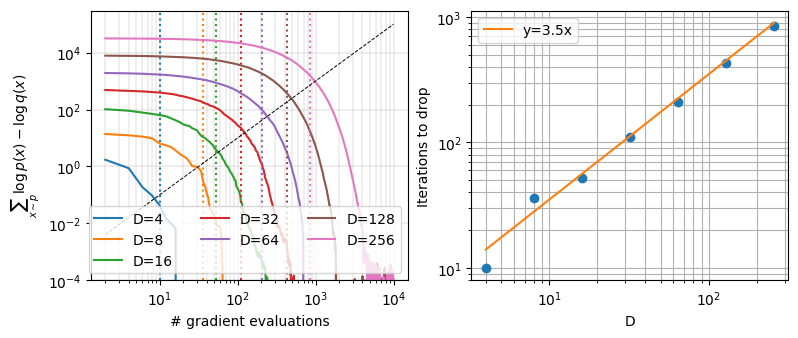

In [9]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)

mode = 'fdivs'
fsize = 12

lss = ['-', '--', ':', '-.']

scaling = []

for ib, b in enumerate([ 2]):
    ic = 0 
    lbl = None 
    for d in [2**i for i in range(2, 9)]:
        
        if ib == 0 : lbl = f'D={d}'
        try:
            fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/gsm-frg/d{d}-r{d}-n1.00e-02/B{b:02d}/'
            counts = np.load(f'{fpath}/counts.npy')
            
            if mode == 'fdivs':
                divs = np.load(f'{fpath}//fdivs.npy')
                plt.plot(counts, -divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl)
                
                idd = np.where(- divs[..., 0] < - divs[1, 0]/20.)[0][0]
                plt.axvline(counts[idd], color=f'C{ic}', ls=":")
                scaling.append([d, counts[idd]])
                
            elif mode == 'qdivs':
                divs = np.load(f'{fpath}//qdivs.npy')
                plt.plot(counts, divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl)            
                
        except Exception as e:
            print(e)
        ic+=1



plt.xlabel('# gradient evaluations')
if mode == 'fdivs': 
    plt.ylabel(r'$\sum_{x \sim p} \log p(x) - \log q(x)$')
    plt.ylim(1e-4, 3e5)    
    
if mode == 'qdivs': 
    plt.ylabel(r'$\sum_{x \sim q} \log q(x) - \log p(x)$')
    plt.ylim(1e-3, 2e3)    

plt.plot(counts, counts**2*1e-3, 'k--', lw=0.7)

plt.loglog()
plt.legend(loc=4, ncol=3)

plt.grid(which='both', lw=0.3)


plt.subplot(122)
scaling = np.array(scaling).T

plt.plot(scaling[0], scaling[1], 'o')
plt.plot(scaling[0], 3.5*scaling[0]**1, label='y=3.5x')
plt.loglog()
plt.grid(which='both')
plt.xlabel('D')
plt.ylabel('Iterations to drop')
plt.legend()

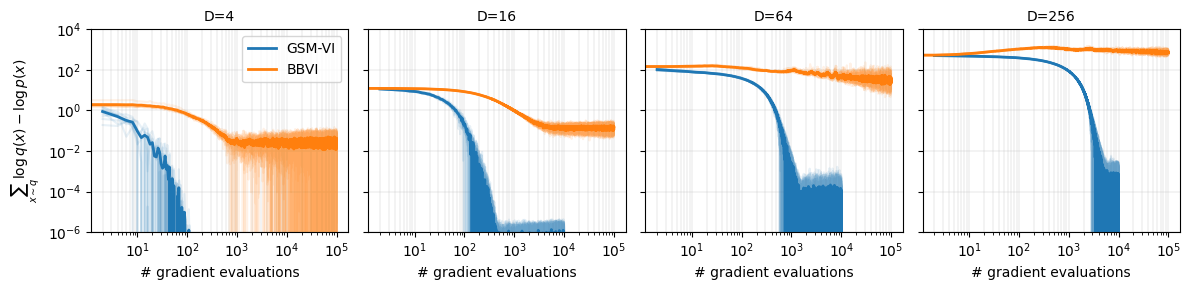

In [11]:
mode = 'qdivs'

fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

d = 10
b = 2
for ic, d in enumerate([4, 16, 64, 256]):
    ax[ic].set_title(f'D={d}', fontsize=10)
    losses = []
    for j in range(10):
        fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/gsm-frg/d{d}-r{d}-n1.00e-02/B{b:02d}/S{j}/'
        counts = np.load(f'{fpath}/counts.npy')
        divs = np.load(f'{fpath}//{mode}.npy')
        if mode == 'fdivs': divs *= -1
        losses.append(divs)
        ax[ic].plot(counts, losses[-1][..., 0], 'C0', alpha=0.1)
    losses = np.array(losses)
    ax[ic].plot(counts, losses.mean(axis=0)[..., 0], 'C0', lw=2, label="GSM-VI")

    losses = []
    for j in range(10):
        fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/bbvi-frg-full/d{d}-r{d}-n1.00e-02/B{b:02d}-lr1.0e-02/S{j}/'
        counts = np.load(f'{fpath}/counts.npy')
        divs = np.load(f'{fpath}//{mode}.npy')
        if mode == 'fdivs': divs *= -1
        # divs = np.load(f'{fpath}//qdivs.npy')
        losses.append(divs)
        ax[ic].plot(counts, losses[-1][..., 0], 'C1', alpha=0.1)
    losses = np.array(losses)
    ax[ic].plot(counts, losses.mean(axis=0)[..., 0], 'C1', lw=2, label="BBVI")

#     losses = []
#     for j in range(10):
#         fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/bbvi-frg-full/d{d}-r{d}-n1.00e-02/B{b:02d}-lr1.0e-01/S{j}/'
#         counts = np.load(f'{fpath}/counts.npy')
#         divs = np.load(f'{fpath}//{mode}.npy')
#         if mode == 'fdivs': divs *= -1
#         # divs = np.load(f'{fpath}//qdivs.npy')
#         losses.append(divs)
#         ax[ic].plot(counts, losses[-1][..., 0], 'C2', alpha=0.1)
#     losses = np.array(losses)
#     # ax[ic].plot(counts, losses.mean(axis=0)[..., 0], 'C2', lw=2, label="BBVI")

#     losses = []
#     for j in range(10):
#         fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/bbvi-frg-full/d{d}-r{d}-n1.00e-02/B{b:02d}-lr1.0e-03/S{j}/'
#         counts = np.load(f'{fpath}/counts.npy')
#         divs = np.load(f'{fpath}//{mode}.npy')
#         if mode == 'fdivs': divs *= -1
#         # divs = np.load(f'{fpath}//qdivs.npy')
#         losses.append(divs)
#         ax[ic].plot(counts, losses[-1][..., 0], 'C3', alpha=0.1)
#     losses = np.array(losses)
#     # ax[ic].plot(counts, losses.mean(axis=0)[..., 0], 'C2', lw=2, label="BBVI")
    ic+=1
                


for axis in ax:
    axis.loglog()
    axis.grid(which='both', lw=0.2)
    axis.set_xlabel('# gradient evaluations')
    if mode == 'qdivs': 
        axis.set_ylim(1e-6, 1e4)    
        ax[0].set_ylabel(r'$\sum_{x \sim q} \log q(x) - \log p(x)$')
    if mode == 'fdivs': 
        axis.set_ylim(1e-6, 1e6)    
        ax[0].set_ylabel(r'$\sum_{x \sim p} \log p(x) - \log q(x)$')
    ax[0].legend()
plt.tight_layout()

# plt.savefig(f'./figs/gsmpaper/frg-{mode}.png')
# plt.savefig(f'./figs/gsmpaper/frg-{mode}.pdf')


# arch-sinh

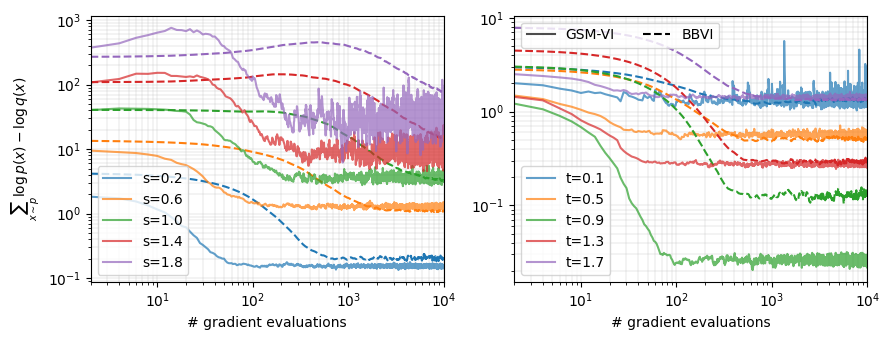

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3.5), sharex=True)

ic = 0 


p0, = ax[1].plot(np.NaN, np.NaN, 'k-', label='GSM-VI', alpha=0.7)
p1, = ax[1].plot(np.NaN, np.NaN, 'k--', label='BBVI', alpha=1.0, lw=1.5)

for s in np.arange(0.2, 2.2, 0.4):

    losses = []
    for j in range(10):
        divs = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/gsm-frg/d10-s{s:0.1f}-t1.0/B02/S{j}/fdivs.npy')
        counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/gsm-frg/d10-s{s:0.1f}-t1.0/B02/counts.npy')
        losses.append(divs)
    losses = np.array(losses)
    ax[0].plot(counts, -losses.mean(axis=0)[..., 0], 'C%d'%ic, alpha=0.7, label=f's={s:0.1f}')

    losses = []
    for j in range(10):
        divs = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-02/d10-s{s:0.1f}-t1.0/S{j}/fdivs.npy')
        counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-02/d10-s{s:0.1f}-t1.0/S{j}/counts.npy')
        losses.append(divs)
    losses = np.array(losses)
    ax[0].plot(counts, -losses.mean(axis=0)[..., 0], f'C{ic}--', lw=1.5)

    losses = []
    for j in range(10):
        try:
            divs = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-01/d10-s{s:0.1f}-t1.0/S{j}/fdivs.npy')
            counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-01/d10-s{s:0.1f}-t1.0/S{j}/counts.npy')
            ax[0].plot(counts, -divs, f'C{ic}:', lw=1.5, alpha=0.5)
            losses.append(divs)
        except:
            pass

    ic +=1 
    


ic = 0 
legends = [[], []]
for t in np.arange(0.1, 2.1, 0.4):
    losses = []
    for j in range(10):
        divs = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/gsm-frg/d10-s0.0-t{t:0.1f}/B02/S{j}/fdivs.npy')
        counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/gsm-frg/d10-s0.0-t{t:0.1f}/B02/S{j}/counts.npy')
        losses.append(divs)
    losses = np.array(losses)
    lines, = ax[1].plot(counts, -losses.mean(axis=0)[..., 0], 'C%d'%ic, alpha=0.7, label=f't={t:0.1f}')
    legends[0].append(lines)
    legends[1].append(f't={t:0.1f}')   

    
    losses = []
    for j in range(10):
        divs = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-02/d10-s0.0-t{t:0.1f}/S{j}/fdivs.npy')
        counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-02/d10-s0.0-t{t:0.1f}/S{j}/counts.npy')
        losses.append(divs)
    losses = np.array(losses)
    ax[1].plot(counts, -losses.mean(axis=0)[..., 0], 'C%d--'%ic, lw=1.5)
    
    losses = []
    for j in range(10):
        try:
            divs = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-01/d10-s0.0-t{t:0.1f}/S{j}/fdivs.npy')
            counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/ArchSinh/bbvi-frg-full/B02-lr1.0e-01/d10-s0.0-t{t:0.1f}/S{j}/counts.npy')
            ax[1].plot(counts, -divs, f'C{ic}:', lw=1.5, alpha=0.5)
            losses.append(divs)
        except:
            pass
    
    ic += 1


for axis in ax:
    # axis.legend()
    axis.grid(which='both', lw=0.2)
    axis.loglog()
    axis.set_xlim(2, 1e4)
    axis.set_xlabel('# gradient evaluations')
ax[0].set_ylabel(r'$\sum_{x\sim p} \log p(x) - \log q(x)$')

ax[0].legend()
l = legend([p0,p1], ["GSM-VI", "BBVI"], loc=2, ncol=2)
ax[1].legend(*legends, loc=3)
ax[1].add_artist(l)

plt.tight_layout()

# plt.savefig(f'./figs/gsmpaper/archsinch-fdivs.png')
# plt.savefig(f'./figs/gsmpaper/archsinch-fdivs.pdf')

plt.show()



# condition number 

In [11]:
# lss = ['-', '--', ':', '-.']

# d = 10
# for ib, b in enumerate([ 2]):
#     ic = 0 
#     lbl = None 
#     for c in [1, 10, 100, 1000]:
        
#         if ib == 0 : lbl = f'D={d}'
#         losses = []
#         for j in range(10):
#             fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/gsm-frg/d{d}-c{c}-n1.00e-02/B{b:02d}/S{j}/'
#             counts = np.load(f'{fpath}/counts.npy')
#             divs = np.load(f'{fpath}//fdivs.npy')
#             losses.append(-divs)
#             # divs = np.load(f'{fpath}//qdivs.npy')
#             # plt.plot(counts, -divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl, alpha=0.5)
#             # plt.plot(counts, divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl)
#         losses = np.array(losses)
#         plt.plot(counts, losses.mean(axis=0)[..., 0])
#         ic+=1

# for ib, b in enumerate([ 2]):
#     ic = 0 
#     lbl = None 
#     for c in [1, 10, 100, 1000]:
        
#         if ib == 0 : lbl = f'D={d}'
#         losses = []
#         for j in range(10):
#             fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/bbvi-frg-full/d{d}-c{c}-n1.00e-02/B{b:02d}-lr1.0e-01/S{j}/'
#             counts = np.load(f'{fpath}/counts.npy')
#             divs = np.load(f'{fpath}//fdivs.npy')
#             losses.append(-divs)
#             # divs = np.load(f'{fpath}//qdivs.npy')
#             # plt.plot(counts, -divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl, alpha=0.5)
#             # plt.plot(counts, divs[..., 0], f'C{ic}', ls=lss[ib], label=lbl)
#         losses = np.array(losses)
#         plt.plot(counts, losses.mean(axis=0)[..., 0], '--')
#         ic+=1
                


# # plt.ylim(1e-3, 1e5)    
# plt.loglog()
# # plt.semilogx()
# plt.legend(bbox_to_anchor=(1, 1))
# # plt.xlim(10, 1000)
# plt.grid(which='both', lw=0.3)

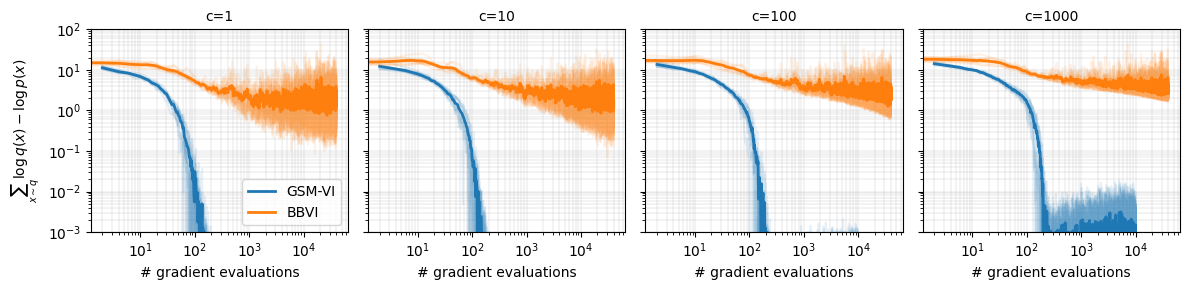

In [17]:

lss = ['-', '--', ':', '-.']
fsize = 12

mode = 'qdivs'
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharex=True, sharey=True)

d = 10
for ic, c in enumerate([1, 10, 100, 1000]):
    ax[ic].set_title(f'c={c}', fontsize=10)
    losses = []
    for j in range(10):
        fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/gsm-frg/d{d}-c{c}-n1.00e-02/B{b:02d}/S{j}/'
        counts = np.load(f'{fpath}/counts.npy')
        divs = np.load(f'{fpath}//{mode}.npy')
        if mode == 'fdivs': divs *= -1
        losses.append(divs)
        ax[ic].plot(counts, losses[-1][..., 0], 'C0', alpha=0.1)
    losses = np.array(losses)
    ax[ic].plot(counts, losses.mean(axis=0)[..., 0], 'C0', lw=2, label="GSM-VI")

    losses = []
    for j in range(10):
        fpath = f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/FRG/bbvi-frg-full/d{d}-c{c}-n1.00e-02/B{b:02d}-lr1.0e-01/S{j}/'
        counts = np.load(f'{fpath}/counts.npy')
        divs = np.load(f'{fpath}//{mode}.npy')
        if mode == 'fdivs': divs *= -1
        # divs = np.load(f'{fpath}//qdivs.npy')
        losses.append(divs)
        ax[ic].plot(counts, losses[-1][..., 0], 'C1', alpha=0.1)
    losses = np.array(losses)
    ax[ic].plot(counts, losses.mean(axis=0)[..., 0], 'C1', lw=2, label="BBVI")
                


for axis in ax:
    axis.loglog()
    axis.grid(which='both', lw=0.2)
    axis.set_xlabel('# gradient evaluations')
    if mode == 'qdivs': 
        axis.set_ylim(1e-3, 1e2)    
        ax[0].set_ylabel(r'$\sum_{x \sim q} \log q(x) - \log p(x)$')
    if mode == 'fdivs': 
        axis.set_ylim(1e-5, 2e5)    
        ax[0].set_ylabel(r'$\sum_{x \sim p} \log p(x) - \log q(x)$')
    ax[0].legend()
plt.tight_layout()
# plt.savefig(f'./figs/gsmpaper/illcond-{mode}.png')
# plt.savefig(f'./figs/gsmpaper/illcond-{mode}.pdf')

# PosteriorDb 

In [18]:
pathfinder = {}
pathfinder['glm'] = [0, 23, 30, 40, 52, 81]
pathfinder['gp'] = [14, 64, 68]
pathfinder['gaussmix'] = [3, 48, 49]
pathfinder['heirarchical'] = [31, 85]
pathfinder['diffeq']  = [20, 51]
pathfinder['hmm']  = [11, 69]
pathfinder['time_series_models']  = [33, 44, 99]

##To be run
## 14, 48, 49, 20 , 51, 11, 69
##modeint - 14, 68, 48, 49, 20 

In [20]:
for key in pathfinder.keys():
    print("Model type : ", key)
    for i in pathfinder[key]:
            # posterior = my_pdb.posterior(pos[i])
            # posname = posterior.name
            # print(posname)
            modpath = '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_%d/gsm-frg/B02/S0/'%i
            if os.path.isfile(modpath + '/samples.npy'): 
                print(f"Model {i} is of size D = {np.load(modpath + '/samples.npy').shape[-1]}")
            else:
                print(i,  "needs to be run")
            
    print("---")

Model type :  glm
Model 0 is of size D = 10
Model 23 is of size D = 26
Model 30 is of size D = 3
Model 40 is of size D = 2
Model 52 is of size D = 5
Model 81 is of size D = 6
---
Model type :  gp
14 needs to be run
Model 64 is of size D = 3
Model 68 is of size D = 13
---
Model type :  gaussmix
Model 3 is of size D = 5
Model 48 is of size D = 5
Model 49 is of size D = 5
---
Model type :  heirarchical
Model 31 is of size D = 10
Model 85 is of size D = 10
---
Model type :  diffeq
20 needs to be run
Model 51 is of size D = 8
---
Model type :  hmm
11 needs to be run
Model 69 is of size D = 8
---
Model type :  time_series_models
Model 33 is of size D = 4
Model 44 is of size D = 7
Model 99 is of size D = 4
---


In [21]:
models = np.concatenate([pathfinder[key] for key in pathfinder.keys()])
toshow = [23, 68, 48, 31, 51, 11, 44, 85]


In [22]:
# names = {23: 'diamonds-diamonds', 
#          64: 'gp_pois_regr-gp_regr', 
#          48: 'low_dim_gauss_mix_collapse-low_dim_gauss_mix_collapse', 
#          31: 'eight_schools-eight_schools_centered', 
#          51: 'hudson_lynx_hare-lotka_volterra', 
#          11: 'bball_drive_event_1-hmm_drive_1', 
#          44: 'arK-arK', 
#          85: 'eight_schools-eight_schools_noncentered'}
names = {23: 'diamonds', 
         64: 'gp_pois_regr', 
         48: 'low_dim_gauss_mix', 
         31: 'eight_schools_centered', 
         51: 'hudson_lynx_hare', 
         11: 'bball_drive-hmm', 
         44: 'arK-arK', 
         85: 'eight_schools_noncentered',
        68: 'gp_pois_regr'}

In [23]:
' '.join([f'{i}' for i in models])

'0 23 30 40 52 81 14 64 68 3 48 49 31 85 20 51 11 69 33 44 99'

In [24]:
' '.join([f'{i}' for i in toshow])

'23 68 48 31 51 11 44 85'

23: diamonds
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_23//bbvi-frg-full/B02-lr1.0e-01-scale0.10-modeinit/S0/qdivs.npy'


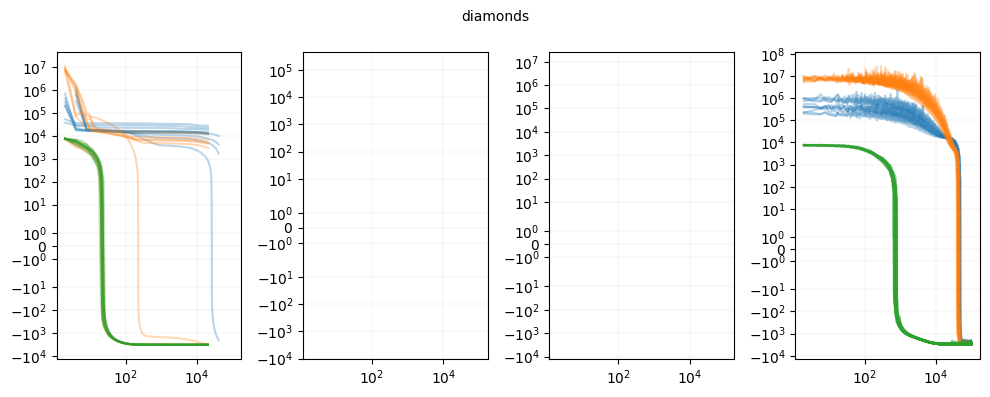

68: gp_pois_regr
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_68//bbvi-frg-full/B02-lr1.0e-01/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_68//bbvi-frg-full/B02-lr1.0e-01-modeinit/S0/qdivs.npy'


/tmp/ipykernel_760213/1740103643.py:93: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis.loglog()


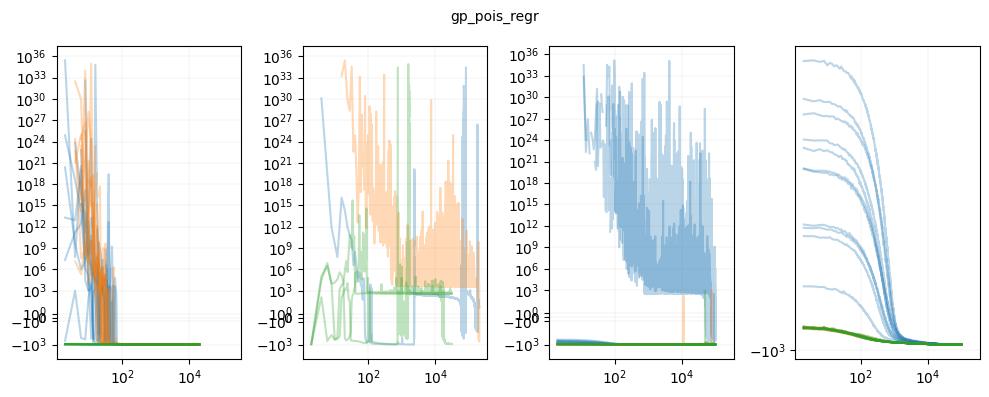

48: low_dim_gauss_mix
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_48//bbvi-frg-full/B02-lr1.0e-01-scale0.10-modeinit/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_48//bbvi-frg-full/B02-lr1.0e-02/S1/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_48//bbvi-frg-full/B02-lr1.0e-03/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_48//bbvi-frg-full/B02-lr1.0e-03-scale0.10-modeinit/S0/qdivs.npy'


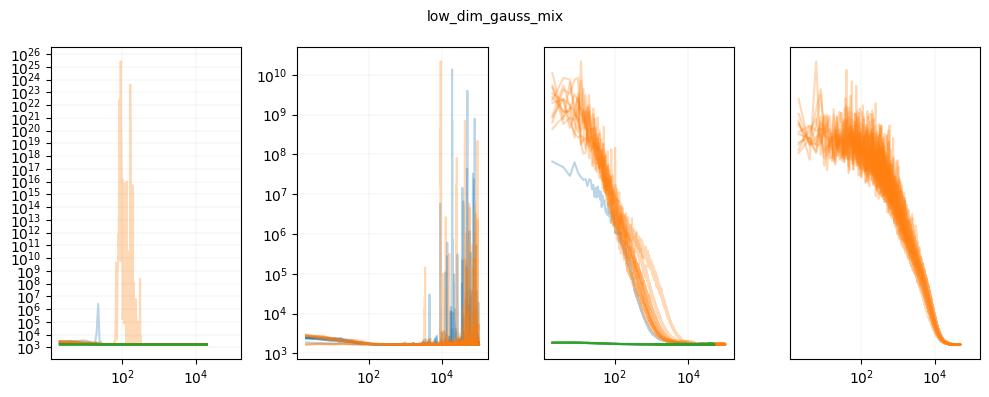

31: eight_schools_centered
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_31//bbvi-frg-full/B02-lr1.0e-01/S2/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_31//bbvi-frg-full/B02-lr1.0e-01-modeinit/S6/qdivs.npy'


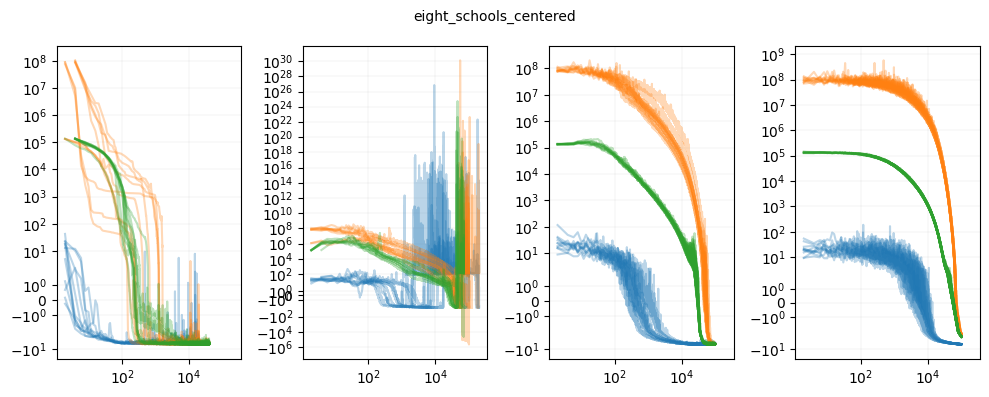

51: hudson_lynx_hare
Exception in GSM  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_51//gsm-frg/B02/S3/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_51//bbvi-frg-full/B02-lr1.0e-01-scale0.10-modeinit/S0/qdivs.npy'


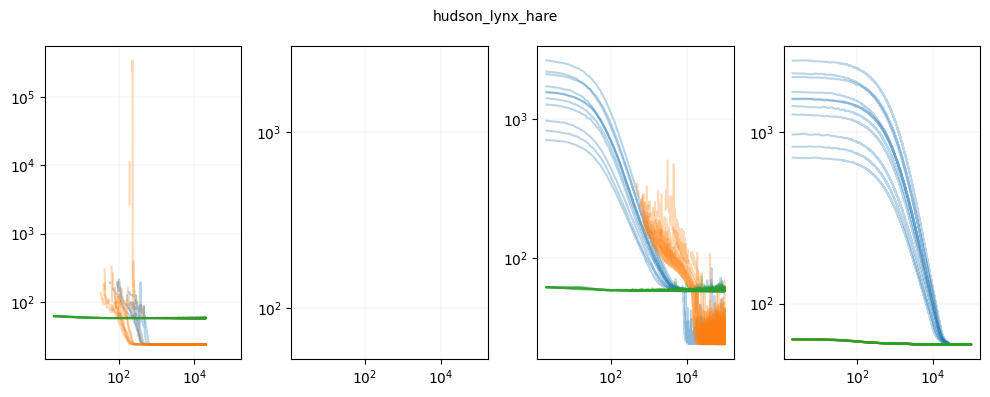

11: bball_drive-hmm
Exception in GSM  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_11//gsm-frg/B02/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_11//bbvi-frg-full/B02-lr1.0e-01-scale0.10-modeinit/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_11//bbvi-frg-full/B02-lr1.0e-03-scale0.10-modeinit/S0/qdivs.npy'


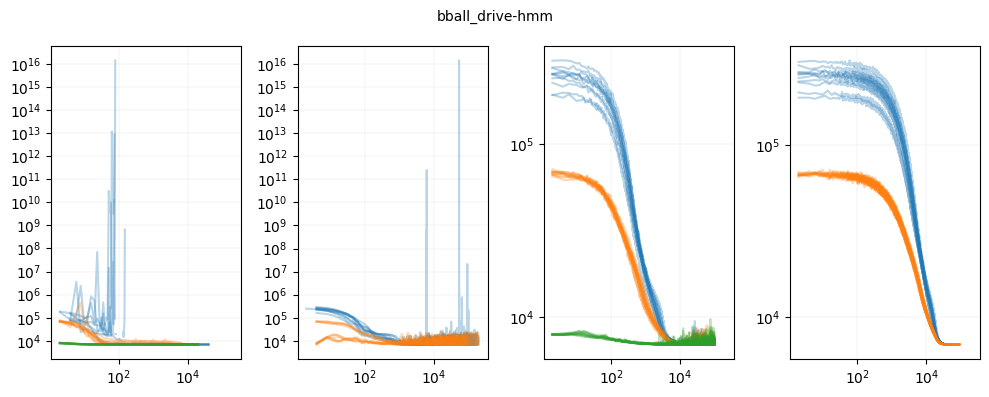

44: arK-arK
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_44//bbvi-frg-full/B02-lr1.0e-01/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_44//bbvi-frg-full/B02-lr1.0e-01-modeinit/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_44//bbvi-frg-full/B02-lr1.0e-01-scale0.10-modeinit/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_44//bbvi-frg-full/B02-lr1.0e-03/S0/qdivs.npy'
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_44//bbvi-frg-full/B02-lr1.0e-03-modeinit/S2/qdivs.npy'


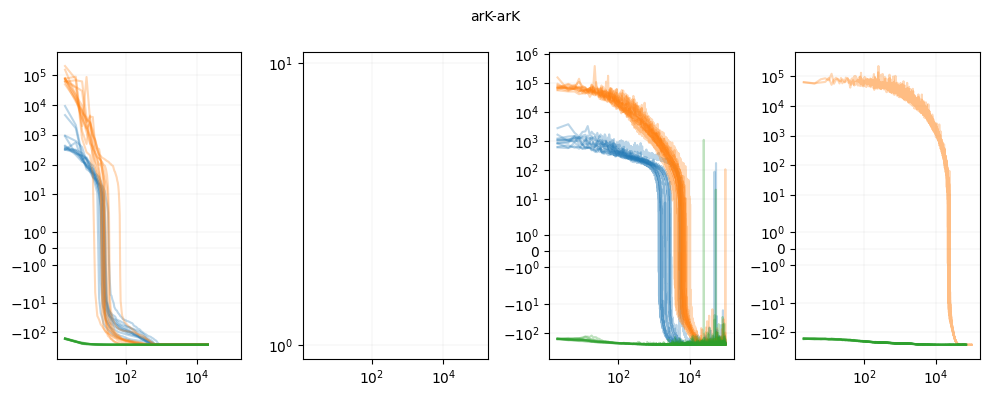

85: eight_schools_noncentered
Exception in BBVI  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_85//bbvi-frg-full/B02-lr1.0e-01/S0/qdivs.npy'


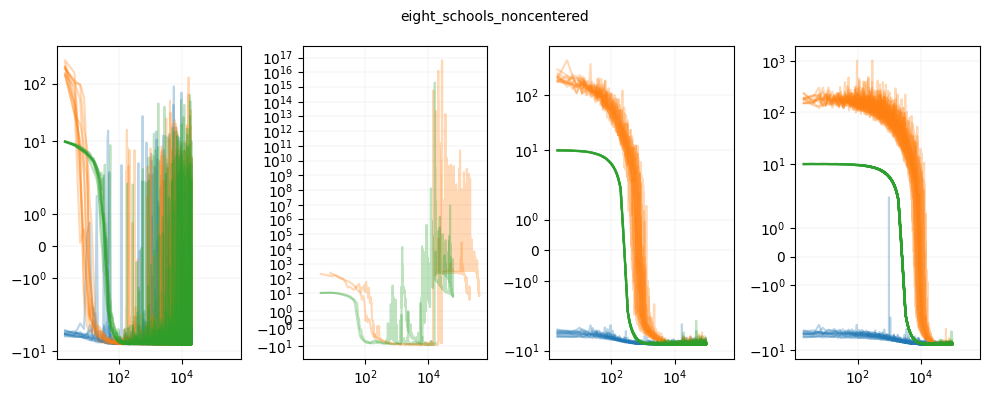

In [26]:
def get_gsm(n, suffix, b=2, mode='qdivs'):
    lls, ccs = [], []
    printe = 1
    for i in range (11):
        try:
            losses = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//gsm-frg/B{b:02d}{suffix}/S{i}/{mode}.npy')[...,0]
            counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}/gsm-frg/B{b:02d}{suffix}/S{i}/counts.npy')
            lls.append(losses)
            ccs.append(counts)
        except Exception as e:
            if printe == 1:
                print('Exception in GSM ', e)
                printe = 0 
    return lls, ccs

def get_bbvi(n, lr, suffix, b=2, mode='qdivs'):
    lls, ccs = [], []
    printe = 1
    for i in range (11):
        try:
            losses = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//bbvi-frg-full/B{b:02d}-lr{lr:0.1e}{suffix}/S{i}/{mode}.npy')[...,0]
            counts = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//bbvi-frg-full/B{b:02d}-lr{lr:0.1e}{suffix}/S{i}/counts.npy')
            lls.append(losses)
            ccs.append(counts)
        except Exception as e:
            if printe == 1:
                print('Exception in BBVI ', e)
                printe = 0 
    return lls, ccs


def get_ylims(lls, imax=100, imin=-1000, ymin=1e99, ymax=-1e99):
    for l in lls:
        idx = ~(np.isnan(l[imin:]) | np.isinf(l[imin:]))
        # while ~idx.sum():
        #     imin *= 2
        #     idx = ~(np.isnan(l[imin:]) | np.isinf(l[imin:]))
        ymin = min(ymin, l[imin:][idx].min())
        
        idx = ~(np.isnan(l[:imax]) | np.isinf(l[:imax]))
        # while ~idx.sum():
        #     imin *= 2
        #     idx = ~(np.isnan(l[:imax]) | np.isinf(l[:imax]))
        ymax = max(ymax, l[:imax][idx].max())
    return ymin, ymax
                      
    
mode = 'qdivs'
b = 2

for n in toshow:
# for n in [51]:
        
    fig, ax = plt.subplots(1, 4, figsize=(10, 4), sharex=True, sharey=False)
    print(f'{n}: {names[n]}')
    
    plt.suptitle(f'{names[n]}', fontsize=10)
    
    lls, ccs = get_gsm(n, '', b=b, mode=mode)
    try: 
        for j in range(len(lls)): ax[0].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
    except: pass

    lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
    try: 
        for j in range(len(lls)): ax[0].plot(ccs[j], lls[j], 'C1', alpha=alpha)
    except: pass

    lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
    try: 
        for j in range(len(lls)): ax[0].plot(ccs[j], lls[j], 'C2', alpha=alpha)
    except: pass


    for ilr, lr in enumerate([1e-1, 1e-2, 1e-3]):
        lls, ccs = get_bbvi(n, lr, '', b=b, mode=mode)
        try:
            for j in range(len(lls)): ax[ilr+1].plot(ccs[j], lls[j], 'C0', alpha=alpha)
        except : pass

        lls, ccs = get_bbvi(n, lr, '-modeinit', b=b, mode=mode)
        try: 
            for j in range(len(lls)): ax[ilr+1].plot(ccs[j], lls[j], 'C1', alpha=alpha)
        except: pass

        lls, ccs = get_bbvi(n, lr, '-scale0.10-modeinit', b=b, mode=mode)
        try: 
            for j in range(len(lls)): ax[ilr+1].plot(ccs[j], lls[j], 'C2', alpha=alpha)
        except: pass


    for axis in ax:
        axis.loglog()
        axis.set_xscale('log')
        axis.set_yscale('symlog')
        # plt.ylim(ymin*1.1, ymax*1.1)
        # plt.ylim(min(ymin*0.9, ymin*1.1), ymax*1.1)
        axis.grid(which='both', lw=0.1)
    plt.tight_layout()
    plt.show()


Exception in GSM  [Errno 2] No such file or directory: '/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_51//gsm-frg/B02/S3/qdivs.npy'


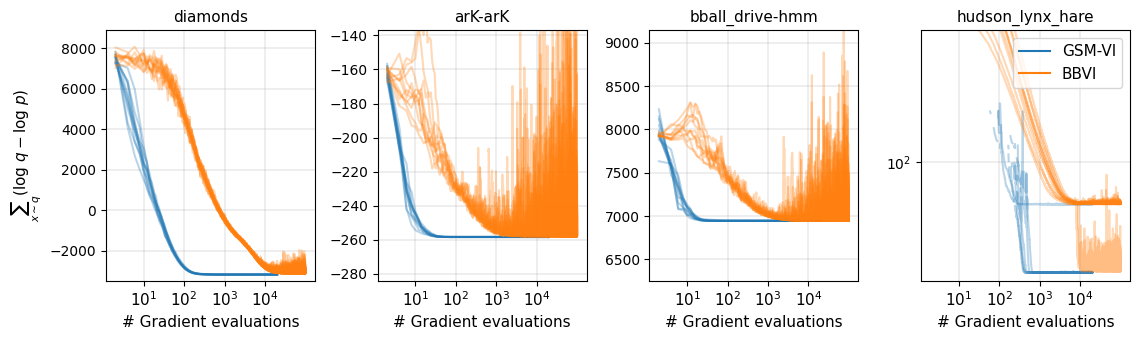

In [35]:
##################
fig, ax = plt.subplots(1, 4, figsize=(11.5, 3.5), sharex=True)

mode = 'qdivs'
b = 2
fsize = 11
alpha=0.3

imodel, n = 0, 23
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-3, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)

############
imodel, n = 1, 44
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99


# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)

############
imodel, n = 2, 11
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99

# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)


############
imodel, n = 3, 51
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99

# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# # ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

# lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

ymax = 5e2
ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)
ax[imodel].plot(np.NaN, np.NaN, 'C0', label='GSM-VI')
ax[imodel].plot(np.NaN, np.NaN, 'C1', label='BBVI')
ax[imodel].legend(fontsize=fsize)


for axis in ax:

    axis.semilogx()
    xticks = [10, 100, 1000, 10000]
    axis.set_xticks(xticks)

    ylims = axis.get_ylim()
    if abs(ylims[1]/ylims[0]) > 10.: 
        axis.set_yscale('symlog')

    axis.grid(which='both', lw=0.3)
    axis.set_xlabel('# Gradient evaluations', fontsize=fsize)
    if mode == 'qdivs':
        ax[0].set_ylabel('$\sum_{x\sim q}(\log\, q - \log\, p)$', fontsize=fsize)
    if mode == 'fdivs':
        ax[0].set_ylabel('$\sum_{x\sim p}(\log\, q - \log\, p)$', fontsize=fsize)

    axis.tick_params(axis='x', which='major', labelsize=fsize)
    axis.tick_params(axis='y', which='major', labelsize=fsize-1)
    # axis.yaxis.set_ticklabels([])
plt.tight_layout()

# plt.savefig('./figs/gsmpaper/pdb_glike.png')
# plt.savefig('./figs/gsmpaper/pdb_glike.pdf')

-968.14954 -862.47473


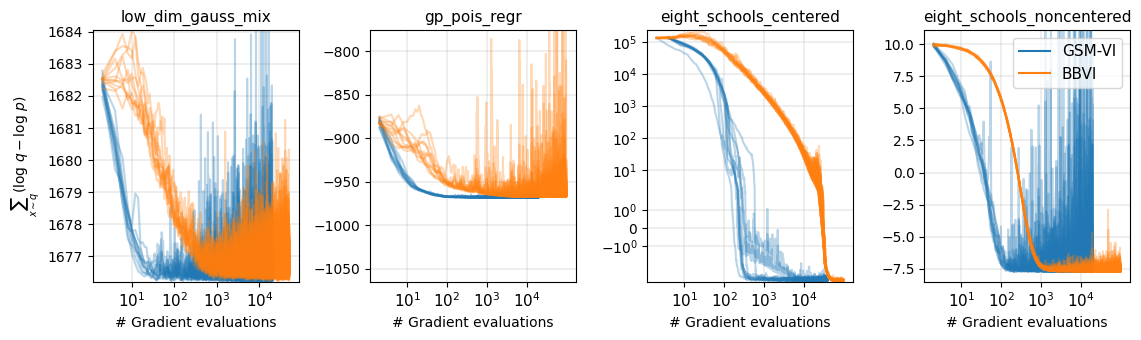

In [36]:
                   
fig, ax = plt.subplots(1, 4, figsize=(11.5, 3.5))

mode = 'qdivs'
b = 2
fsize=11
alpha=0.3


imodel, n = 0, 48
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99

# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
ax[imodel].set_ylim(ymin, ymax)


############
imodel, n = 1, 68
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99


# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
print(ymin, ymax)
ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), max(ymax*0.9, ymax*1.1))

############
imodel, n = 2, 31
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99

# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)


############
imodel, n = 3, 85
ax[imodel].set_title(f'{names[n]}', fontsize=fsize)
ymin, ymax = 1e99, -1e99

# lls, ccs = get_gsm(n, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-2, '-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

lls, ccs = get_gsm(n, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C0-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
lls, ccs = get_bbvi(n, 1e-2, '-scale0.10-modeinit', b=b, mode=mode)
for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C1-', alpha=alpha)
ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)
# lls, ccs = get_bbvi(n, 1e-1, '-scale0.10-modeinit', b=b, mode=mode)
# for j in range(len(lls)): ax[imodel].plot(ccs[j], lls[j], 'C2-', alpha=alpha)
# ymin, ymax = get_ylims(lls, ymin=ymin, ymax=ymax)

ax[imodel].set_ylim(min(0.9*ymin, 1.1*ymin), ymax*1.1)


ax[2].set_yscale('symlog')
ax[imodel].plot(np.NaN, np.NaN, 'C0', label='GSM-VI')
ax[imodel].plot(np.NaN, np.NaN, 'C1', label='BBVI')
ax[imodel].legend(fontsize=fsize)

for axis in ax:

    # ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

    axis.semilogx()
    xticks = [10, 100, 1000, 10000]
    axis.set_xticks(xticks)
    # axis.semilogy()
    # if abs(ylims[1]/ylims[0]) > 10.: 
    #     axis.set_yscale('symlog')

    # axis.yaxis.set_major_formatter(formatter) 
    # axis.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    axis.grid(which='both', lw=0.3)
    axis.set_xlabel('# Gradient evaluations')
    if mode == 'qdivs':
        ax[0].set_ylabel('$\sum_{x\sim q}(\log\, q - \log\, p)$')
    if mode == 'fdivs':
        ax[0].set_ylabel('$\sum_{x\sim p}(\log\, q - \log\, p)$')

    axis.tick_params(axis='x', which='major', labelsize=fsize)
    axis.tick_params(axis='y', which='major', labelsize=fsize-1)
    # axis.yaxis.set_ticklabels([])
plt.tight_layout()

# plt.savefig('./figs/gsmpaper/pdb_nglike.png')
# plt.savefig('./figs/gsmpaper/pdb_nglike.pdf')

# marginals

In [96]:
from scipy.stats import wasserstein_distance as w_dist

0
1
2
4
3


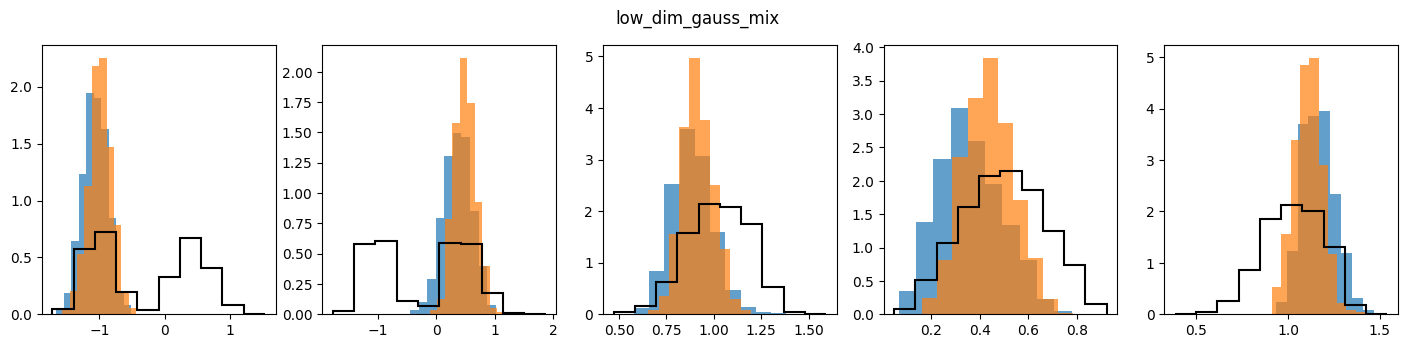

1
0
7
2
12


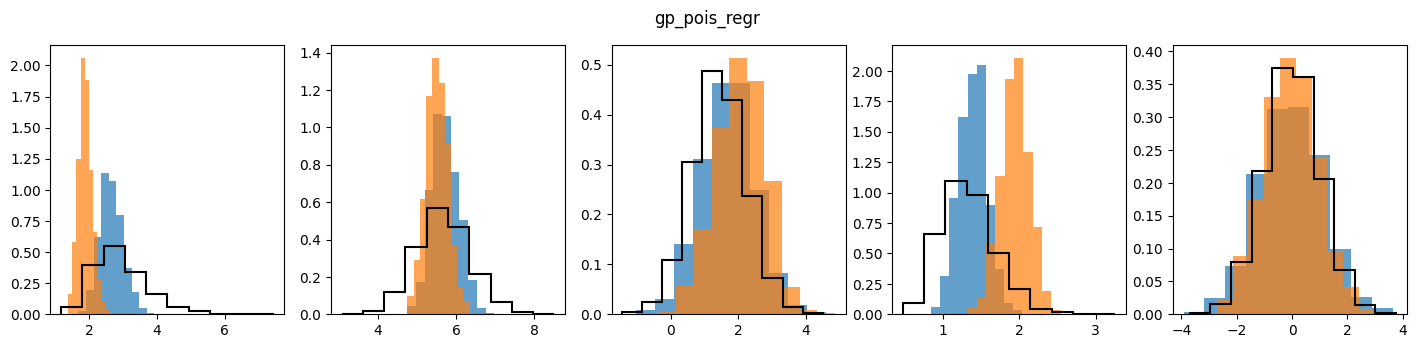

9
0
6
2
7


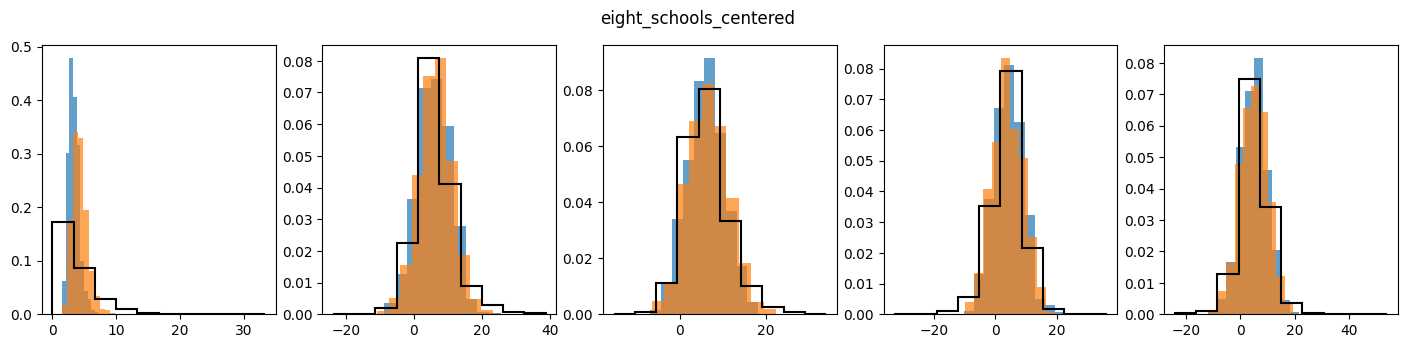

0
6
7
3
1


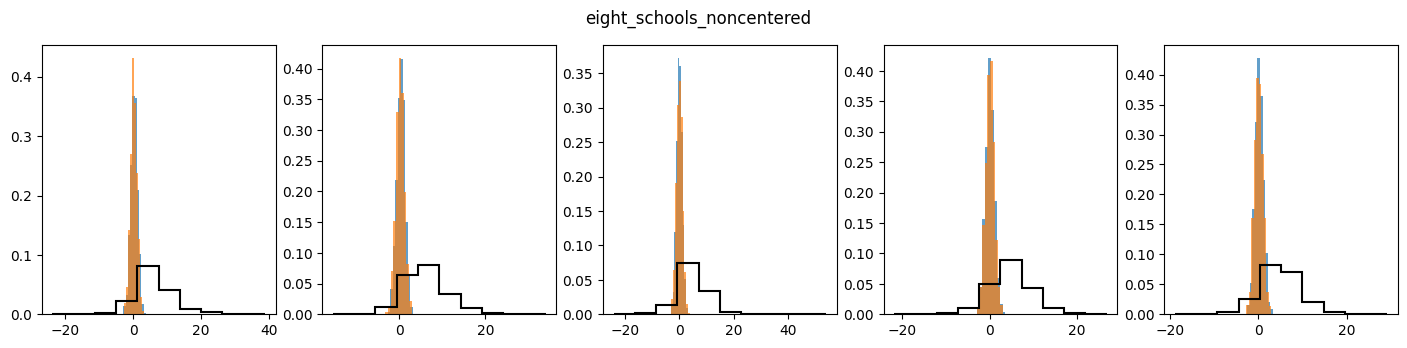

In [155]:
b=2
suffix = '-modeinit'
# suffix = '-scale0.10-modeinit'
seed = 7

for n in [48, 68, 31, 85]:
    lr = 1e-2
    if n == 23: lr = 1e-3
    sb = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//bbvi-frg-full/B{b:02d}-lr{lr:0.1e}{suffix}/S{seed}/samples.npy')
    sg = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//gsm-frg/B{b:02d}{suffix}/S{seed}/samples.npy')
    s0 = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}/samples.npy')
    wdists = np.array([w_dist(s0[:, i], sg[:, i]) for i in range(sg.shape[1])])
    idx = np.argsort(wdists)[::-1]

    dplot = 5 
    fig, ax = plt.subplots(1, dplot, figsize=(3.5*dplot, 3.5))
    for i in range(dplot):
        print(idx[i])
        ax[i].hist(sg[:, idx[i]], color='C0', density=True, alpha=0.7)
        ax[i].hist(sb[:, idx[i]], color='C1', density=True, alpha=0.7)
        ax[i].hist(s0[:, idx[i]], histtype='step', color='k', density=True, lw=1.5)
    plt.suptitle(names[n], fontsize=fsize+1)
    # plt.savefig(f'./figs/gsmpaper/hist{n}.png')
    plt.show()

2
1
3
0
21


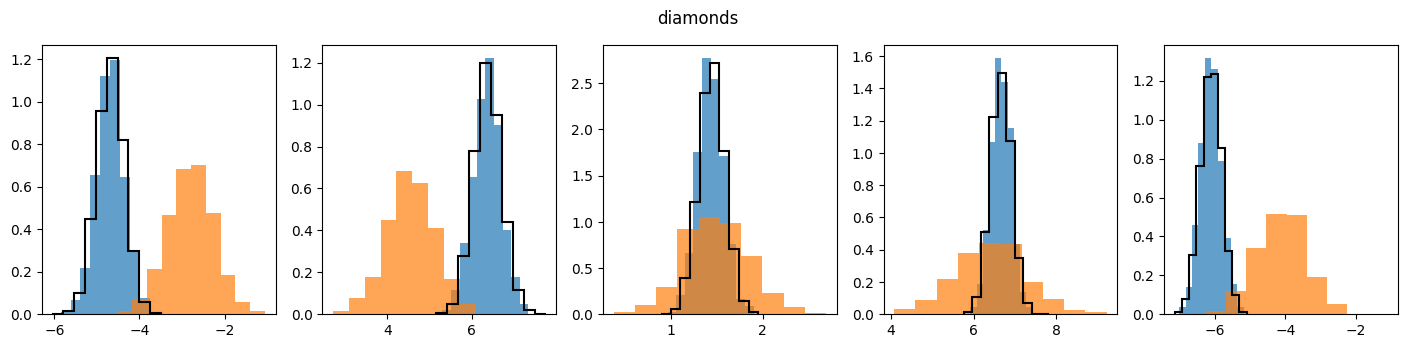

4
2
3
5
1


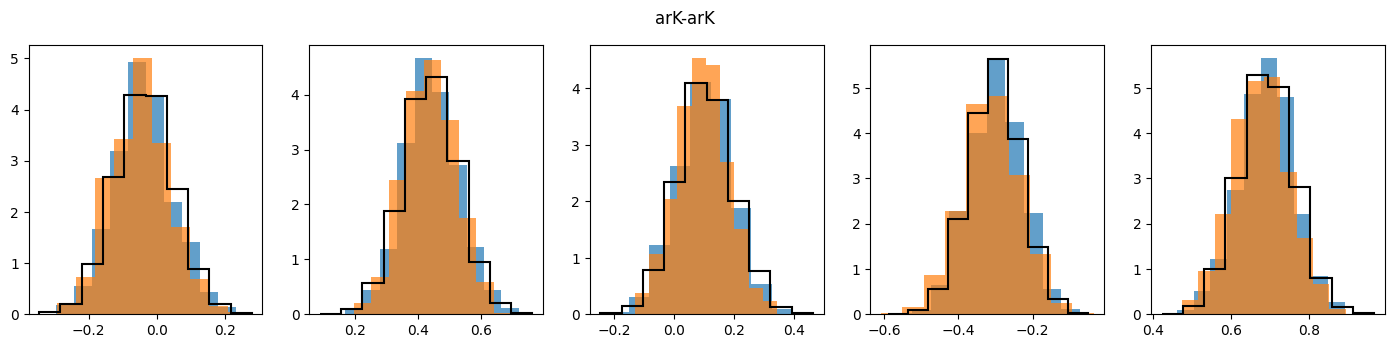

1
0
2
3
4


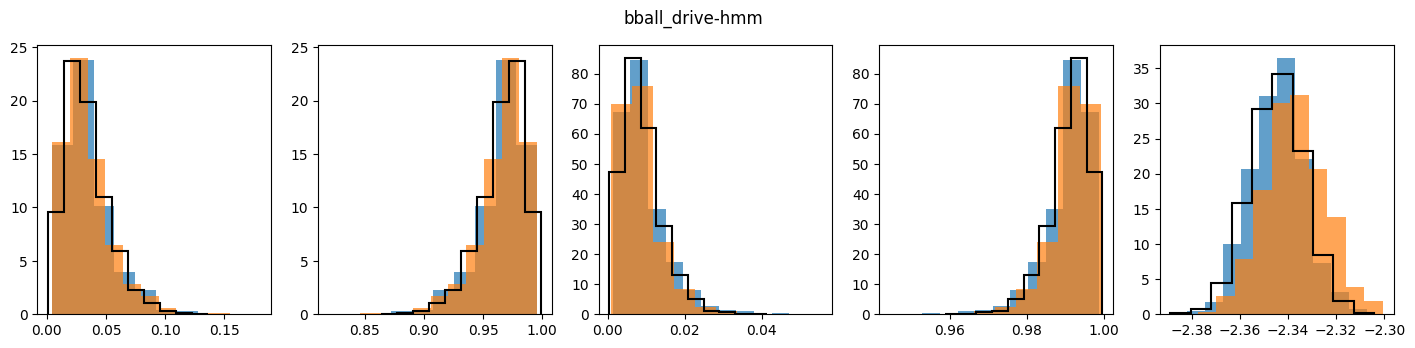

4
5
6
2
0


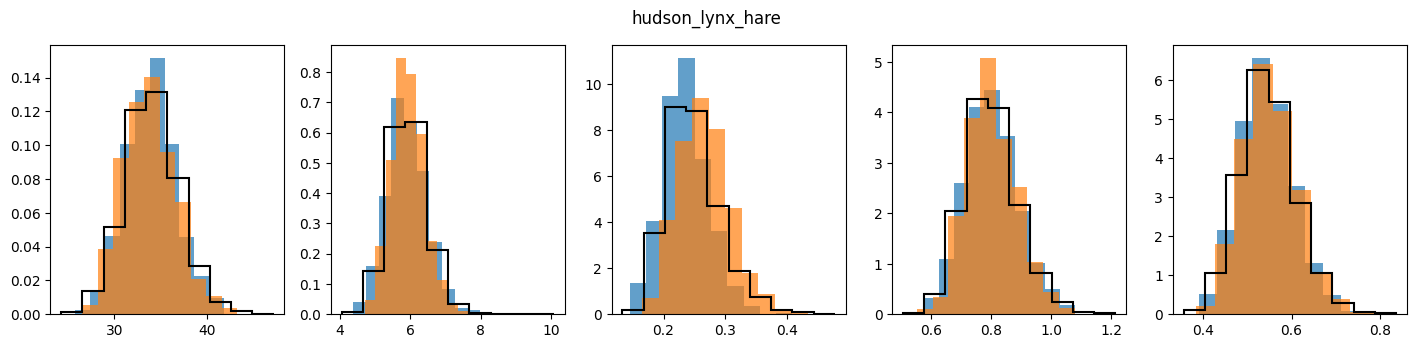

In [154]:
b=2
suffix = '-modeinit'
# suffix = '-scale0.10-modeinit'
seed = 7

for n in [23, 44, 11, 51]:
    lr = 1e-2
    if n == 23: lr = 1e-3
    sb = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//bbvi-frg-full/B{b:02d}-lr{lr:0.1e}{suffix}/S{seed}/samples.npy')
    sg = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}//gsm-frg/B{b:02d}{suffix}/S{seed}/samples.npy')
    s0 = np.load(f'/mnt/ceph/users/cmodi/polyakVI/gsmpaper/PDB_{n}/samples.npy')
    wdists = np.array([w_dist(s0[:, i], sg[:, i]) for i in range(sg.shape[1])])
    idx = np.argsort(wdists)[::-1]

    dplot = 5 
    fig, ax = plt.subplots(1, dplot, figsize=(3.5*dplot, 3.5))
    for i in range(dplot):
        print(idx[i])
        ax[i].hist(sg[:, idx[i]], color='C0', density=True, alpha=0.7)
        ax[i].hist(sb[:, idx[i]], color='C1', density=True, alpha=0.7)
        ax[i].hist(s0[:, idx[i]], histtype='step', color='k', density=True, lw=1.5)
    plt.suptitle(names[n], fontsize=fsize+1)
    # plt.savefig(f'./figs/gsmpaper/hist{n}.png')
    plt.show()

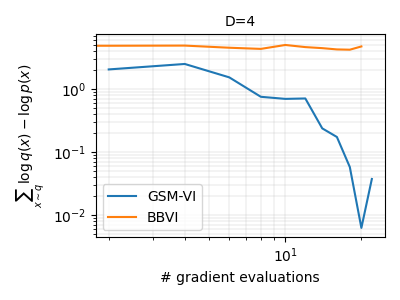

In [11]:
Image('/mnt/home/cmodi/Research/Projects/gsm-vi/scripts/tmp/FRG/d4-c10-n1.00e-02/qdivs.png')

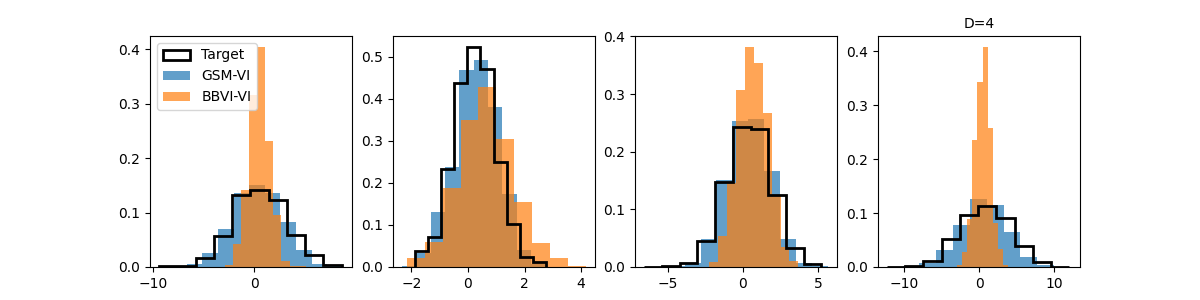

In [12]:
Image('/mnt/home/cmodi/Research/Projects/gsm-vi/scripts/tmp/FRG/d4-c10-n1.00e-02/hist.png')

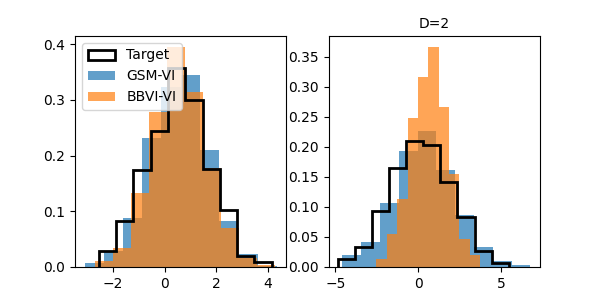

In [15]:
Image('/mnt/home/cmodi/Research/Projects/gsm-vi/scripts/tmp/ArchSinh/d2-s0.0-t0.9/hist.png')

In [ ]:
Image('/mnt/home/cmodi/Research/Projects/gsm-vi/scripts/tmp/ArchSinh/d4-s0.5-t1.0/hist.png')